In [1]:
from tools import model, cd_diagram, benchmark_clustering
from dataset_management import get_dataset
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# (Re-)Generate significance scores
data=get_dataset(dataset_name="fig5/fig5_full")
data=data.loc[(data["used_fidelity"].isin(range(1,25)))&(data["prior"].isin(["at25","bad"]))]
benchmark_clustering(data,"algorithm",("HB","PB"),"benchmark","prior","normalized_regret","used_fidelity","./datasets/benchmark_clust_at25bad_int"),


P-values adjusted by tukey method for family of 276 estimates


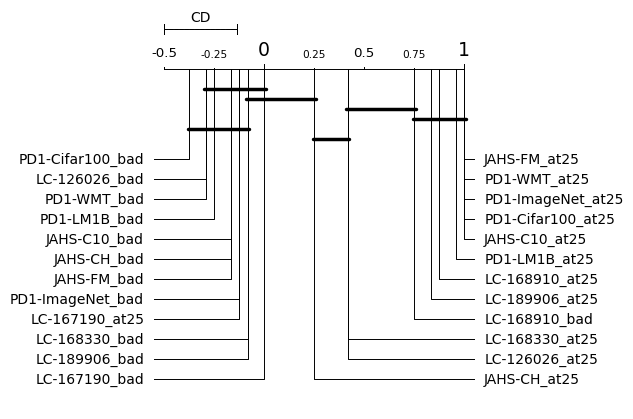

In [2]:
wins_bench=pd.read_parquet("datasets/benchmark_clusterings/benchmark_clust_at25bad_int.parquet")

wins_model=model(f"wins~bench_prior+fidelity",wins_bench,"bench_prior")

fig=plt.figure(cd_diagram(wins_model.post_hoc("bench_prior"),system_id="bench_prior",reverse=False, width=5))

#Optional
# plt.savefig(dpi=300,pad_inches=0.1, bbox_inches="tight",fname="img/bench_clust_at25bad_int_fid_anon_prior.png")